In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:

import numpy as np
import pandas as pd
import yfinance as yf      #helps us to download market data from finance
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stocks=input("enter the code of the stock: ")
data=yf.download(stocks, "2008-01-01", "2021-01-18")
data.head()

enter the code of the stock: GC=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,878.000000,21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3281 entries, 2008-01-02 to 2021-01-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3281 non-null   float64
 1   High       3281 non-null   float64
 2   Low        3281 non-null   float64
 3   Close      3281 non-null   float64
 4   Adj Close  3281 non-null   float64
 5   Volume     3281 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.4 KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,1316.287291,1323.427614,1308.463700,1316.037885,1316.037885,5606.854008
std,262.732678,264.022456,261.294638,262.754237,262.754237,29568.392331
min,705.000000,715.500000,681.000000,704.900024,704.900024,0.000000
25%,1183.400024,1189.400024,1176.199951,1183.400024,1183.400024,41.000000
50%,1282.500000,1287.099976,1277.800049,1282.099976,1282.099976,137.000000
75%,1486.199951,1491.599976,1477.300049,1484.000000,1484.000000,442.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


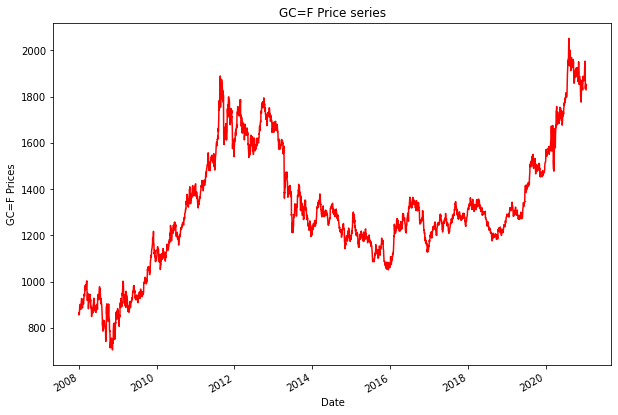

In [6]:
data.Close.plot(figsize=(10,7), color='r')  # close is the target variable
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price series". format(stocks))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


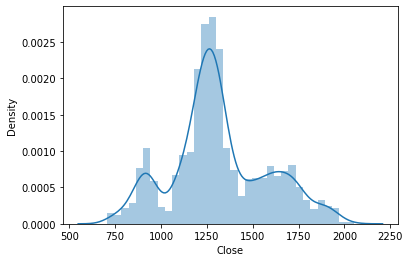

In [7]:
sns.distplot(data["Close"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


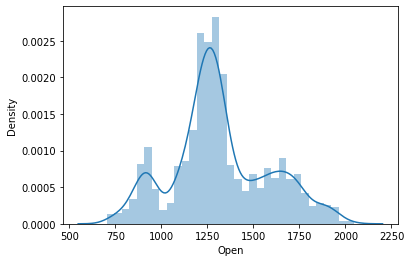

In [8]:
sns.distplot(data["Open"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


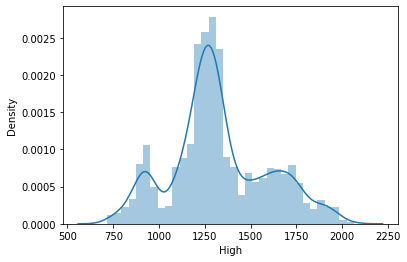

In [9]:
sns.distplot(data["High"])

In [10]:
x=data.drop("Close", axis=1)
y=data["Close"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)  #random state is used to reproduce the problem the same every time it is run
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2624, 5)
(657, 5)
(2624,)
(657,)


In [11]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)
pred1=lr.predict(x_test)

In [12]:
pred1

array([1728.69995117, 1093.30004883, 1259.69995117, 1107.19995117,
       1386.80004883,  901.70001221, 1250.59997559, 1290.09997559,
       1209.5       , 1898.59997559, 1155.19995117, 1921.59997559,
       1579.30004883, 1218.09997559,  955.79998779, 1721.09997559,
       1373.09997559, 1318.69995117,  934.59997559, 1326.5       ,
       1312.69995117, 1324.30004883, 1156.30004883, 1060.09997559,
       1214.19995117, 1645.5       , 1197.69995117, 1869.90002441,
       1648.69995117, 1284.19995117, 1392.59997559, 1277.69995117,
        865.40002441, 1613.40002441, 1352.30004883, 1350.19995117,
       1320.59997559, 1062.40002441, 1234.90002441, 1166.90002441,
       1366.59997559, 1187.90002441, 1290.40002441, 1490.30004883,
       1265.59997559, 1293.5       , 1226.59997559, 1183.59997559,
       1826.69995117, 1273.69995117, 1380.        , 1352.40002441,
       1330.5       , 1656.19995117, 1642.09997559, 1310.69995117,
       1104.40002441, 1239.69995117, 1279.59997559,  899.79998

In [13]:
from sklearn.metrics import mean_squared_error, r2_score


def calculate_metrics(y_test, y_pred):
  '''
  y_test: ground truth
  y_pred: model predict
  '''
  mse=mean_squared_error(y_test, y_pred)
  rmse=np.sqrt(mse)
  r2_scors=r2_score(y_test, y_pred)
  print("MSE:", mse)
  print("RMSE:", rmse)
  print("R2_SCORE", r2_scors)

  

In [14]:
calculate_metrics(y_test, pred1)

MSE: 2.0557920865428854e-23
RMSE: 4.53408434696895e-12
R2_SCORE 1.0


In [15]:
from sklearn.linear_model import Lasso, Ridge
la=Lasso().fit(x_train, y_train)
ri=Ridge().fit(x_train, y_train)
la_p=la.predict(x_test)
ri_p=ri.predict(x_test)

In [16]:
calculate_metrics(y_test, la_p)

MSE: 10.94214147347952
RMSE: 3.307890789231035
R2_SCORE 0.9998360348053783


In [17]:
calculate_metrics(y_test, ri_p)

MSE: 5.7173188703658376e-09
RMSE: 7.56129543819433e-05
R2_SCORE 0.9999999999999143


In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr=SVR()
parm_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid= GridSearchCV(SVR(), parm_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.028 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.009 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.033 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.019 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.028 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.003 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.009 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.033 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.019 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
svr=SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(x_train, y_train)
svr_pred=svr.predict(x_test)

In [22]:
import joblib


joblib.dump(ri, 'model.pkl')
ridge_from_joblib=model=joblib.load("model.pkl")